**Gambler's ruin: how likely is the gambler still in the game after $n$ steps?**

In [1]:
using PyPlot

In [2]:
## Function to construct the transition matrix.
## Note in Julia matrix indices start with 1, 
## so all the indices here are off by 1, i.e.,
## 1 really means 0, 2 really means 1, etc.
function transmat(N;p=0.4)
    P = zeros(N+1,N+1)
    q = 1-p
    P[1,1] = P[N+1,N+1] = 1
    for i=2:N
        P[i,i-1]=q
        P[i,i+1]=p
    end
    P
end

transmat (generic function with 1 method)

In [3]:
P=transmat(3)

4×4 Array{Float64,2}:
 1.0  0.0  0.0  0.0
 0.6  0.0  0.4  0.0
 0.0  0.6  0.0  0.4
 0.0  0.0  0.0  1.0

In [4]:
## Use the above to calculate the probability of being alive after n steps, starting with X0 dollars.
function aliveprob(X0,n; N=3, p=0.4)
    P=transmat(N;p=p)
    1. - (P^n)[X0+1,1]
end

aliveprob (generic function with 1 method)

Probability of being in the game after $n$ steps, starting with $X_0$ dollars for different values of $X_0$.

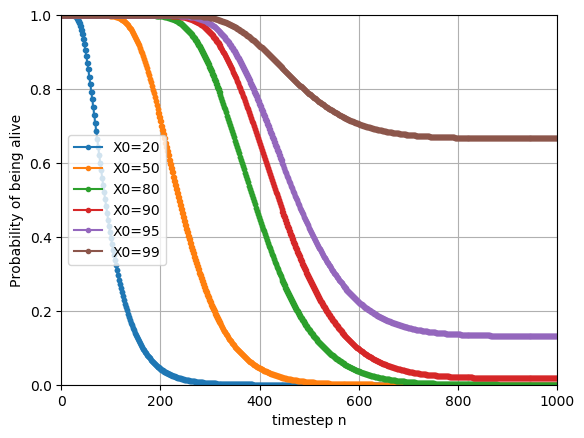

PyObject Text(24.000000000000007, 0.5, 'Probability of being alive')

In [5]:
let nl=0:1000,
    N=100
    for X0 in [20,50,80,90,95,99]
        plot(nl,map(n->aliveprob(X0,n;N=N),nl),".-"; label="X0=$X0")
    end
    axis([minimum(nl),maximum(nl),0,1])
    legend()
    grid()
    xlabel("timestep n")
    ylabel("Probability of being alive")
end

Probabiliity of being in the game after $n=400$ steps, as a function of $X_0$.

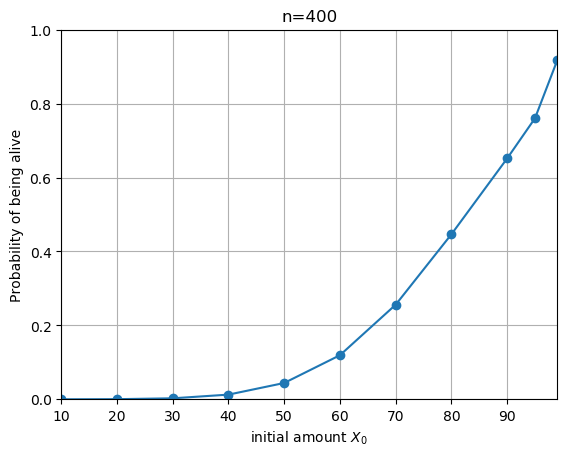

PyObject Text(0.5, 1, 'n=400')

In [6]:
let n=400,
    N=100,
    X0l = [10,20,30,40,50,60,70,80,90,95,99]
    plot(X0l,map(X0->aliveprob(X0,n;N=N),X0l),"o-")
    axis([minimum(X0l),maximum(X0l),0,1])
    grid()
    xlabel(L"initial amount $X_0$")
    ylabel("Probability of being alive")
    title("n=$n")
end